In [1]:
import torch
from torch import nn

import torchvision
from torchvision import datasets
from torchvision.transforms import ToTensor

import matplotlib.pyplot as plt
import numpy as np

import os
from PIL import Image
from tqdm.auto import tqdm


In [5]:
train_data = datasets.CIFAR10(
    root="/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10",
    train=True,
    download=True,
    transform=train_data_transform
)

test_data = datasets.CIFAR10(
    root="/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10",
    train=False,
    download=True,
    transform=test_data_transform
)

Files already downloaded and verified
Files already downloaded and verified


In [ ]:
len(train_data), len(test_data)

(50000, 10000)

In [ ]:
image, label = train_data[0]
image, label

(tensor([[[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]],
 
         [[0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          ...,
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.],
          [0., 0., 0.,  ..., 0., 0., 0.]]]),
 6)

In [ ]:
image.shape

torch.Size([3, 32, 32])

In [ ]:
# See classes
class_names = train_data.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Image shape: torch.Size([3, 32, 32])


NameError: name 'class_names' is not defined

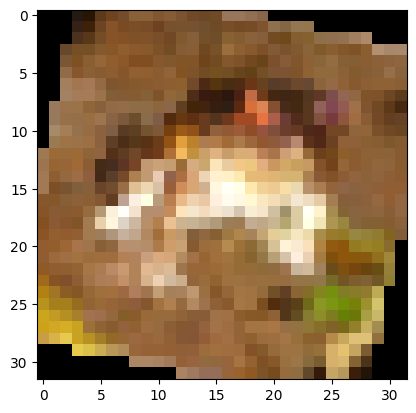

In [ ]:
image, label = train_data[0]
print(f"Image shape: {image.shape}")
# image = np.array(image)
img = np.transpose(image, (1, 2, 0))
plt.imshow(img.squeeze(), )
plt.title(class_names[label]);

In [ ]:
image.squeeze()

tensor([[[0.2314, 0.1686, 0.1961,  ..., 0.6196, 0.5961, 0.5804],
         [0.0627, 0.0000, 0.0706,  ..., 0.4824, 0.4667, 0.4784],
         [0.0980, 0.0627, 0.1922,  ..., 0.4627, 0.4706, 0.4275],
         ...,
         [0.8157, 0.7882, 0.7765,  ..., 0.6275, 0.2196, 0.2078],
         [0.7059, 0.6784, 0.7294,  ..., 0.7216, 0.3804, 0.3255],
         [0.6941, 0.6588, 0.7020,  ..., 0.8471, 0.5922, 0.4824]],

        [[0.2431, 0.1804, 0.1882,  ..., 0.5176, 0.4902, 0.4863],
         [0.0784, 0.0000, 0.0314,  ..., 0.3451, 0.3255, 0.3412],
         [0.0941, 0.0275, 0.1059,  ..., 0.3294, 0.3294, 0.2863],
         ...,
         [0.6667, 0.6000, 0.6314,  ..., 0.5216, 0.1216, 0.1333],
         [0.5451, 0.4824, 0.5647,  ..., 0.5804, 0.2431, 0.2078],
         [0.5647, 0.5059, 0.5569,  ..., 0.7216, 0.4627, 0.3608]],

        [[0.2471, 0.1765, 0.1686,  ..., 0.4235, 0.4000, 0.4039],
         [0.0784, 0.0000, 0.0000,  ..., 0.2157, 0.1961, 0.2235],
         [0.0824, 0.0000, 0.0314,  ..., 0.1961, 0.1961, 0.

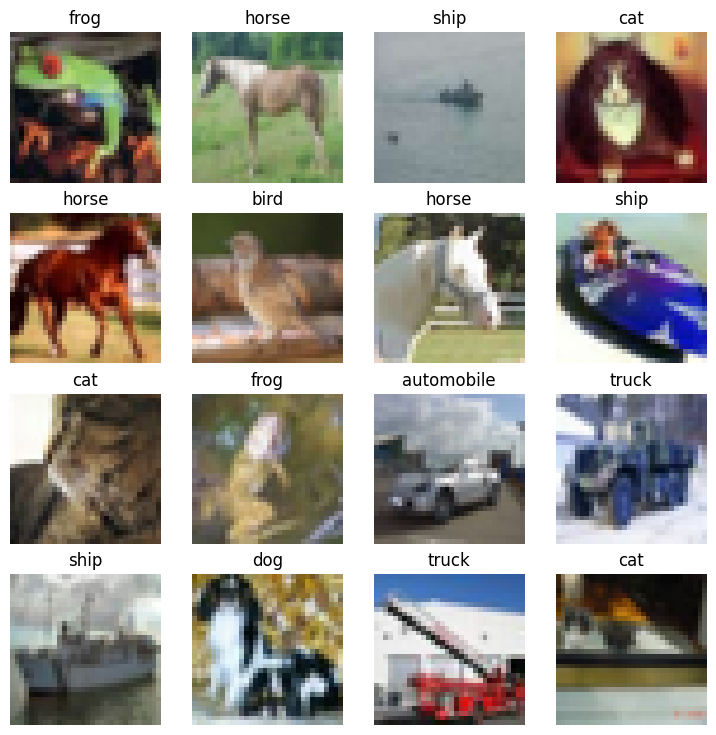

In [ ]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9, 9))
rows, cols = 4, 4
for i in range(1, rows * cols + 1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i)
    img = np.transpose(img, (1, 2, 0))
    plt.imshow(img.squeeze())
    plt.title(class_names[label])
    plt.axis(False);

In [6]:
from torch.utils.data import DataLoader

# Setup the batch size hyperparameter
BATCH_SIZE = 32

# Turn datasets into iterables (batches)
train_dataloader = DataLoader(train_data, # dataset to turn into iterable
    batch_size=BATCH_SIZE, # how many samples per batch?
    shuffle=True # shuffle data every epoch?
)

test_dataloader = DataLoader(test_data,
    batch_size=BATCH_SIZE,
    shuffle=False # don't necessarily have to shuffle the testing data
)

# Let's check out what we've created
print(f"Dataloaders: {train_dataloader, test_dataloader}")
print(f"Length of train dataloader: {len(train_dataloader)} batches of {BATCH_SIZE}")
print(f"Length of test dataloader: {len(test_dataloader)} batches of {BATCH_SIZE}")

Dataloaders: (<torch.utils.data.dataloader.DataLoader object at 0x7e5c5552d090>, <torch.utils.data.dataloader.DataLoader object at 0x7e5c5552cee0>)
Length of train dataloader: 1563 batches of 32
Length of test dataloader: 313 batches of 32


In [ ]:
train_dataloader

In [ ]:
# Check out what's inside the training dataloader
train_features_batch, train_labels_batch = next(iter(train_dataloader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

NameError: name 'class_names' is not defined

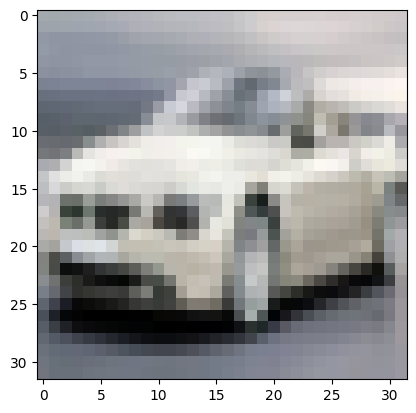

In [ ]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img, label = train_features_batch[random_idx], train_labels_batch[random_idx]
img = np.transpose(img, (1, 2, 0))
plt.imshow(img.squeeze())
plt.title(class_names[label])
plt.axis("Off");
print(f"Image size: {img.shape}")
print(f"Label: {label}, label size: {label.shape}")

In [ ]:
image, label = train_dataloader[0]
image.

TypeError: 'DataLoader' object is not subscriptable

In [ ]:
# Create a flatten layer
flatten_model = nn.Flatten() # all nn modules function as a model (can do a forward pass)

# Get a single sample
x = train_features_batch[0]

# Flatten the sample
output = flatten_model(x) # perform forward pass

# Print out what happened
print(f"Shape before flattening: {x.shape} -> [color_channels, height, width]")
print(f"Shape after flattening: {output.shape} -> [color_channels, height*width]")

# Try uncommenting below and see what happens
print(x)
print(output)

Shape before flattening: torch.Size([3, 32, 32]) -> [color_channels, height, width]
Shape after flattening: torch.Size([3, 1024]) -> [color_channels, height*width]
tensor([[[0.6627, 0.6745, 0.6745,  ..., 0.6549, 0.6353, 0.6157],
         [0.6706, 0.6706, 0.6706,  ..., 0.6588, 0.6510, 0.6353],
         [0.6510, 0.6353, 0.6157,  ..., 0.6471, 0.6471, 0.6314],
         ...,
         [0.4039, 0.4157, 0.3529,  ..., 0.3137, 0.3294, 0.3412],
         [0.3843, 0.4157, 0.3647,  ..., 0.3216, 0.3176, 0.3255],
         [0.3647, 0.3922, 0.3686,  ..., 0.3137, 0.3059, 0.3059]],

        [[0.6431, 0.6549, 0.6549,  ..., 0.6392, 0.6157, 0.5961],
         [0.6510, 0.6510, 0.6510,  ..., 0.6392, 0.6314, 0.6157],
         [0.6314, 0.6157, 0.5961,  ..., 0.6275, 0.6275, 0.6118],
         ...,
         [0.4431, 0.4588, 0.4196,  ..., 0.3725, 0.3843, 0.3961],
         [0.4196, 0.4549, 0.4275,  ..., 0.3765, 0.3725, 0.3804],
         [0.4000, 0.4314, 0.4314,  ..., 0.3686, 0.3608, 0.3608]],

        [[0.5686, 0.5804

# Data Augmentation

In [3]:
import torch
from torch.utils.data import DataLoader, Subset
from torchvision import datasets, transforms

### Transforming data with "torchvision.transforms"

In [4]:
# Write transform for image
train_data_transform = transforms.Compose([
    # Flip the images randomly on the horizontal
    transforms.RandomHorizontalFlip(p=0.5), # p = probability of flip, 0.5 = 50% chance
    transforms.ColorJitter(brightness=0.2), # change the brightness of the image
    transforms.RandomRotation(degrees=15), # rotate the image by 15 degrees
    # Turn the image into a torch.Tensor
    transforms.ToTensor() # this also converts all pixel values from 0 to 255 to be between 0.0 and 1.0
])

# Create test transform
test_data_transform = transforms.Compose([
    transforms.ToTensor()
])

In [ ]:
# Use ImageFolder to create dataset(s)
train_data_folder = datasets.ImageFolder(root="/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train", # target folder of images
                                  transform=train_data_transform, # transforms to perform on data (images)
                                  target_transform=None)

test_data_folder = datasets.ImageFolder(root="/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/test",
                                        transform=test_data_transform)

In [ ]:
train_data_folder.class_to_idx['airplane']

0

In [ ]:
train_data_folder

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               ColorJitter(brightness=(0.8, 1.2), contrast=None, saturation=None, hue=None)
               RandomRotation(degrees=[-15.0, 15.0], interpolation=nearest, expand=False, fill=0)
               ToTensor()
           )

In [ ]:
test_data_folder

Dataset ImageFolder
    Number of datapoints: 50000
    Root location: /content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train
    StandardTransform
Transform: Compose(
               ToTensor()
           )

In [ ]:
import os
def walk_through_dir(dir_path):
  """
  Walks through dir_path returning its contents.
  Args:
    dir_path (str or pathlib.Path): target directory

  Returns:
    A print out of:
      number of subdiretories in dir_path
      number of images (files) in each subdirectory
      name of each subdirectory
  """
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [ ]:
walk_through_dir("/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10")

There are 3 directories and 3 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10'.
There are 0 directories and 8 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/cifar-10-batches-py'.
There are 10 directories and 0 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train'.
There are 0 directories and 5000 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train/frog'.
There are 0 directories and 5000 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train/truck'.
There are 0 directories and 5000 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train/deer'.
There are 0 directories and 5000 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train/automobile'.
There are 0 directories and 5000 images in '/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train/bird'.
There are 0 directories and 5000 images in '/content/drive/MyDrive/Deep Learning with Py

In [ ]:
num_images = len(train_data_folder)
print(f"Number of images in the training dataset: {num_images}")

Number of images in the training dataset: 50000


In [ ]:
image, label = train_data_folder[5]
image, label

(tensor([[[0.0000, 0.0000, 0.7294,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7333,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.7373,  ..., 0.8000, 0.7882, 0.7765],
          ...,
          [0.8980, 0.8941, 0.8902,  ..., 0.8275, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.8471, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.8588, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.8431,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.8431,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.8471,  ..., 0.8588, 0.8510, 0.8471],
          ...,
          [0.8863, 0.8863, 0.8863,  ..., 0.8510, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.8549, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000,  ..., 0.8667, 0.0000, 0.0000]],
 
         [[0.0000, 0.0000, 0.9529,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.9529,  ..., 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.9569,  ...,

In [ ]:
class_names = train_data_folder.classes
class_names

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

Image shape: torch.Size([3, 32, 32])


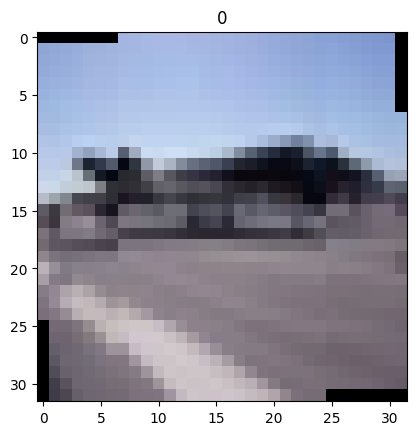

In [ ]:
image, label = train_data_folder[1]
print(f"Image shape: {image.shape}")
# image = np.array(image)
img = np.transpose(image, (1, 2, 0))
plt.imshow(img.squeeze(), )
plt.title(label);

Random image path: /content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train/airplane/image_6479.png
Image class: airplane
Image height: 32
Image width: 32


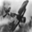

In [ ]:
import random
from PIL import Image

data_path = Path("/content/drive/MyDrive/Deep Learning with Pytorch/CIFAR10/train")
image_path = data_path / "airplane"

# Set seed
random.seed(42) # <- try changing this and see what happens

# 1. Get all image paths (* means "any combination")
image_path_list = list(image_path.glob("*.png"))

# 2. Get random image path
random_image_path = random.choice(image_path_list)

# 3. Get image class from path name (the image class is the name of the directory where the image is stored)
image_class = random_image_path.parent.stem

# 4. Open image
img = Image.open(random_image_path)

# 5. Print metadata
print(f"Random image path: {random_image_path}")
print(f"Image class: {image_class}")
print(f"Image height: {img.height}")
print(f"Image width: {img.width}")
img

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_data))
train_features_batch.shape, train_labels_batch.shape

AttributeError: 'int' object has no attribute 'shape'

In [ ]:
train_features_batch, train_labels_batch = next(iter(train_loader))
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 3, 32, 32]), torch.Size([32]))

# First model only with Linear

In [ ]:
class CifarModelV0(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like data to be in shape [batch_size, color_channels, height, width]
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),

        )

    def forward(self, x):
        return self.layer_stack(x)


In [ ]:
model_0 = CifarModelV0(input_shape=3*32*32, hidden_units=10, output_shape=len(class_names))
model_0.to("cpu")


CifarModelV0(
  (layer_stack): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=3072, out_features=10, bias=True)
    (2): ReLU()
    (3): Linear(in_features=10, out_features=10, bias=True)
  )
)

## Download Helper Func


In [7]:
import requests
from pathlib import Path

# Download helper functions from Learn PyTorch repo (if not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  # Note: you need the "raw" GitHub URL for this to work
  request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

In [8]:
# Import accuracy metric
from helper_functions import accuracy_fn # Note: could also use torchmetrics.Accuracy(task = 'multiclass', num_classes=len(class_names)).to(device)


In [ ]:
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_0.parameters(), lr=0.1)

In [9]:
from timeit import default_timer as timer
def print_train_time(start: float, end: float, device: torch.device = None):
    """Prints difference between start and end time.

    Args:
        start (float): Start time of computation (preferred in timeit format).
        end (float): End time of computation.
        device ([type], optional): Device that compute is running on. Defaults to None.

    Returns:
        float: time between start and end in seconds (higher is longer).
    """
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [ ]:
# Import tqdm for progress bar
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 10

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_0.train()
        # 1. Forward pass
        y_pred = model_0(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_0.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_0(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_0 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_0.parameters()).device))

  0%|          | 0/10 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.25955 | Test loss: 2.16594, Test acc: 17.53%

Epoch: 1
-------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.13587 | Test loss: 2.09651, Test acc: 17.17%

Epoch: 2
-------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.12982 | Test loss: 2.17453, Test acc: 16.48%

Epoch: 3
-------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.12454 | Test loss: 2.14515, Test acc: 16.21%

Epoch: 4
-------
Looked at 0/50000 samples
Looked at 12800/50000 samples
Looked at 25600/50000 samples
Looked at 38400/50000 samples

Train loss: 2.12573 | Test loss: 2.40097, Test acc: 10.57%

Epoch: 5
-------
Looked at 0/5

# Second model with non-linear


In [ ]:
class CifarModelV1(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.layer_stack = nn.Sequential(
            nn.Flatten(), # neural networks like data to be in shape [batch_size, color_channels, height, width]
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            nn.ReLU(),
            nn.Linear(in_features=hidden_units, out_features=output_shape),
            nn.ReLU()
        )

    def forward(self, x: torch.Tensor):
        return self.layer_stack(x)


In [ ]:
model_1.parameters()

NameError: name 'model_1' is not defined

In [ ]:
model_1 = CifarModelV1(input_shape=3*32*32, hidden_units=10, output_shape=len(class_names)).to("cpu")
loss_fn = nn.CrossEntropyLoss() # this is also called "criterion"/"cost function" in some places
optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.1)

In [ ]:


# Set the seed and start the timer
torch.manual_seed(42)
train_time_start_on_cpu = timer()

# Set the number of epochs (we'll keep this small for faster training times)
epochs = 10

# Create training and testing loop
for epoch in tqdm(range(epochs)):
    print(f"Epoch: {epoch}\n-------")
    ### Training
    train_loss = 0
    # Add a loop to loop through training batches
    for batch, (X, y) in enumerate(train_dataloader):
        model_1.train()
        # 1. Forward pass
        y_pred = model_1(X)

        # 2. Calculate loss (per batch)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulatively add up the loss per epoch

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Print out how many samples have been seen
        if batch % 400 == 0:
            print(f"Looked at {batch * len(X)}/{len(train_dataloader.dataset)} samples")

    # Divide total train loss by length of train dataloader (average loss per batch per epoch)
    train_loss /= len(train_dataloader)

    ### Testing
    # Setup variables for accumulatively adding up loss and accuracy
    test_loss, test_acc = 0, 0
    model_1.eval()
    with torch.inference_mode():
        for X, y in test_dataloader:
            # 1. Forward pass
            test_pred = model_1(X)

            # 2. Calculate loss (accumatively)
            test_loss += loss_fn(test_pred, y) # accumulatively add up the loss per epoch

            # 3. Calculate accuracy (preds need to be same as y_true)
            test_acc += accuracy_fn(y_true=y, y_pred=test_pred.argmax(dim=1))

        # Calculations on test metrics need to happen inside torch.inference_mode()
        # Divide total test loss by length of test dataloader (per batch)
        test_loss /= len(test_dataloader)

        # Divide total accuracy by length of test dataloader (per batch)
        test_acc /= len(test_dataloader)

    ## Print out what's happening
    print(f"\nTrain loss: {train_loss:.5f} | Test loss: {test_loss:.5f}, Test acc: {test_acc:.2f}%\n")

# Calculate training time
train_time_end_on_cpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_cpu,
                                           end=train_time_end_on_cpu,
                                           device=str(next(model_1.parameters()).device))

# Third model with CNN Block

In [38]:
class CifarModelV2(nn.Module):
    def __init__(self, input_shape: int, hidden_units: int, output_shape: int):
        super().__init__()

        self.conv_layers = nn.Sequential(
            # Block 1
            nn.Conv2d(3, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(64, 64, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

            # Block 2
            nn.Conv2d(64, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 128, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(128, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.Conv2d(256, 256, kernel_size=3, padding=1),
            nn.ReLU(inplace=True),
            nn.MaxPool2d(kernel_size=2, stride=2),

        )

        # Fully connected layers
        self.fc_layers = nn.Sequential(
            nn.Linear(256 * 8 * 8, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048, 2048),
            nn.ReLU(inplace=True),
            nn.Dropout(),
            nn.Linear(2048, output_shape)
        )
    def forward(self, x):
        x = self.conv_layers(x)
        x = x.view(x.size(0), -1)  # Flatten the tensor
        x = self.fc_layers(x)
        return x

In [39]:
# Setup device-agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [40]:
model_2 = CifarModelV2(input_shape=3, hidden_units=64, output_shape=10).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(), lr=0.05)


In [41]:
print(next(model_2.parameters()).device)


cuda:0


In [42]:
model_2

CifarModelV2(
  (conv_layers): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (10): ReLU(inplace=True)
    (11): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (12): ReLU(inplace=True)
    (13): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (fc_layers): Sequential(
    (0): Linear(in_features=16384, out_features=2048, bias=True)
    (1): ReLU(inplace=True)
    (2): Dropout(p=0.5, inplace=False

In [43]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
    # Put model in train mode
    model.train()

    # Setup train loss and train accuracy values
    train_loss, train_acc = 0, 0

    # Loop through data loader data batches
    for batch, (X, y) in enumerate(dataloader):
        # Send data to target device
        X, y = X.to(device), y.to(device)

        # 1. Forward pass
        y_pred = model(X)

        # 2. Calculate  and accumulate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss.item()

        # 3. Optimizer zero grad
        optimizer.zero_grad()

        # 4. Loss backward
        loss.backward()

        # 5. Optimizer step
        optimizer.step()

        # Calculate and accumulate accuracy metric across all batches
        y_pred_class = torch.argmax(torch.softmax(y_pred, dim=1), dim=1)
        train_acc += (y_pred_class == y).sum().item()/len(y_pred)

    # Adjust metrics to get average loss and accuracy per batch
    train_loss = train_loss / len(dataloader)
    train_acc = train_acc / len(dataloader)
    return train_loss, train_acc

def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
    # Put model in eval mode
    model.eval()

    # Setup test loss and test accuracy values
    test_loss, test_acc = 0, 0

    # Turn on inference context manager
    with torch.inference_mode():
        # Loop through DataLoader batches
        for batch, (X, y) in enumerate(dataloader):
            # Send data to target device
            X, y = X.to(device), y.to(device)

            # 1. Forward pass
            test_pred_logits = model(X)

            # 2. Calculate and accumulate loss
            loss = loss_fn(test_pred_logits, y)
            test_loss += loss.item()

            # Calculate and accumulate accuracy
            test_pred_labels = test_pred_logits.argmax(dim=1)
            test_acc += ((test_pred_labels == y).sum().item()/len(test_pred_labels))

    # Adjust metrics to get average loss and accuracy per batch
    test_loss = test_loss / len(dataloader)
    test_acc = test_acc / len(dataloader)
    return test_loss, test_acc

from tqdm.auto import tqdm

# 1. Take in various parameters required for training and test steps
def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):

    # 2. Create empty results dictionary
    results = {"train_loss": [],
        "train_acc": [],
        "test_loss": [],
        "test_acc": []
    }

    # 3. Loop through training and testing steps for a number of epochs
    for epoch in tqdm(range(epochs)):
        train_loss, train_acc = train_step(model=model,
                                           dataloader=train_dataloader,
                                           loss_fn=loss_fn,
                                           optimizer=optimizer)
        test_loss, test_acc = test_step(model=model,
            dataloader=test_dataloader,
            loss_fn=loss_fn)

        # 4. Print out what's happening
        print(
            f"Epoch: {epoch+1} | "
            f"train_loss: {train_loss:.4f} | "
            f"train_acc: {train_acc:.4f} | "
            f"test_loss: {test_loss:.4f} | "
            f"test_acc: {test_acc:.4f}"
        )

        # 5. Update results dictionary
        results["train_loss"].append(train_loss)
        results["train_acc"].append(train_acc)
        results["test_loss"].append(test_loss)
        results["test_acc"].append(test_acc)

    # 6. Return the filled results at the end of the epochs
    return results

In [ ]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Set number of epochs
NUM_EPOCHS = 100

from timeit import default_timer as timer
start_time = timer()

model_2_results = train(model=model_2,
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn,
                        epochs=NUM_EPOCHS)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/100 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 2.2753 | train_acc: 0.1244 | test_loss: 2.0612 | test_acc: 0.2178
Epoch: 2 | train_loss: 1.9463 | train_acc: 0.2837 | test_loss: 1.8554 | test_acc: 0.3221
Epoch: 3 | train_loss: 1.5737 | train_acc: 0.4254 | test_loss: 1.4110 | test_acc: 0.4943
Epoch: 4 | train_loss: 1.3550 | train_acc: 0.5122 | test_loss: 1.4269 | test_acc: 0.4994
Epoch: 5 | train_loss: 1.1876 | train_acc: 0.5734 | test_loss: 1.1046 | test_acc: 0.6041
Epoch: 6 | train_loss: 1.0421 | train_acc: 0.6281 | test_loss: 1.0298 | test_acc: 0.6297
Epoch: 7 | train_loss: 0.9317 | train_acc: 0.6730 | test_loss: 0.8458 | test_acc: 0.7010
Epoch: 8 | train_loss: 0.8387 | train_acc: 0.7070 | test_loss: 0.8659 | test_acc: 0.6949
Epoch: 9 | train_loss: 0.7579 | train_acc: 0.7354 | test_loss: 0.6883 | test_acc: 0.7632


In [ ]:
!nvidia-smi